In [1]:
pip install xgboost scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [3]:
file_path = 'F:/HOPE/AI Course Tamil/Machine Learning Regression/Boosting Algorithm/XG Boosting/insurance_pre.csv'
df = pd.read_csv(file_path)

In [4]:
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)

In [5]:
X = df[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
y = df['charges']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [8]:
y_pred = xgb_reg.predict(X_test)

In [9]:
r2 = r2_score(y_test, y_pred)

In [10]:
print("R-squared:", r2)

R-squared: 0.8441143918201295


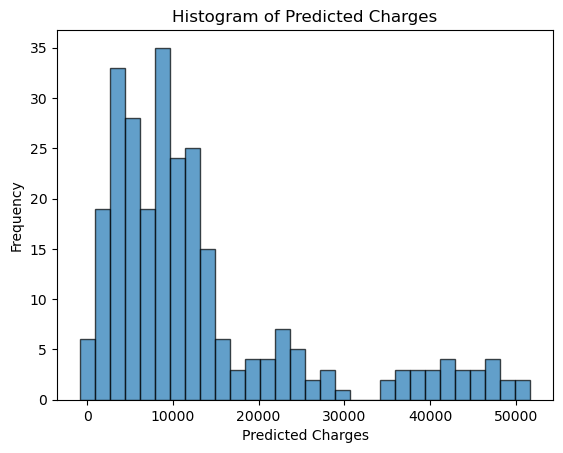

In [11]:
plt.hist(y_pred, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Predicted Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Charges')
plt.show()